# Checkup for one sample WAXS stitching

--> V2: Dev March 20, 2018 adding options in func: Correct_Overlap_Images_Intensities
       
       New Options: do_smooth, pixel_start_smooth, pixel_stop_smooth

### SMI OLOG

SMI Olog (https://logbook.nsls2.bnl.gov/12-ID/)

In [1]:
%matplotlib notebook
from pySMI.smi_libs import *
from pySMI.smi_package import *
plt.rcParams.update({'figure.max_open_warning': 0})
plt.rcParams.update({ 'image.origin': 'lower'   })
plt.rcParams.update({ 'image.interpolation': 'none'   })



/opt/conda_envs/analysis/lib/python3.6/site-packages/IPython/html.py:14: ShimWarning: The `IPython.html` package has been deprecated since IPython 4.0. You should import from `notebook` instead. `IPython.html.widgets` has moved to `ipywidgets`.
  "`IPython.html.widgets` has moved to `ipywidgets`.", ShimWarning)


In [2]:
%run ~/pySMI/pySMI/smi_generic_functions.py

In [3]:
beam_x = 98.0 #97.0 for 2.4 keV; 98 for 16 keV
beam_y = 1316.0   #1475 - 159

energy = 2.47 #2.484 #keV

start_angle = 5.0 #in degree, we will change according to data 
phi_spacing= 6.5  #previously 4 deg



In [4]:
wavelength_A =12.39842/energy
sam_det = 0.275 #in meters
dq = 4*np.pi/wavelength_A  * (172/1e6/sam_det)

calibration = CalibrationGonio(wavelength_A= wavelength_A) # 20.0 keV
calibration.set_image_size(195, height=1475) # Pilatus300kW vertical
#calibration.set_image_size(1475, height=195) # Pilatus300kW horizontal
calibration.set_pixel_size(pixel_size_um=172.0)
calibration.set_beam_position(beam_x,  beam_y )
calibration.set_distance( sam_det )
calibration.set_angles(det_phi_g=0., det_theta_g=0., )
print('ratio Dw = {:.3f}'.format(calibration.get_ratioDw()))
mask_dir = '/GPFS/xf12id1/analysis/commissioning/masks/'
mask = Mask(mask_dir+'Pilatus300kWh_main_gaps-mask.png')
#mask.load('./Pilatus300kWh_current-mask.png')
mask.load(mask_dir+'Pilatus300kWh_current-mask.png')

ratio Dw = 8.199


# Define Cycle &proposal_id here

In [5]:
CYCLE='2018_1'
proposal_id =  '302845'
username = 'Francisco'



In [6]:
inDir = '/GPFS/xf12id1/data/300KW/images/users/%s/'%proposal_id

In [7]:
fp = get_base_all_filenames(inDir,base_filename_cut_length=-12-3 )
print('We found %s samples in %s folder.' %(len( list( fp.keys() ) ), inDir ) )

We found 15 samples in /GPFS/xf12id1/data/300KW/images/users/302845/ folder.


# Create ResDir Here

In [8]:
ResDir0 = os.path.join('/GPFS/xf12id1/analysis/%s/'%CYCLE, proposal_id, 'Results/%s/'%username)
os.makedirs(ResDir0, exist_ok=True)
print('Results from this analysis will be stashed in the directory %s' % ResDir0)

Results from this analysis will be stashed in the directory /GPFS/xf12id1/analysis/2018_1/302845/Results/Francisco/


In [9]:
for k in list(fp.keys()):
    print(k)

test_test_
PDCBT_ITIC_ASSQ_2450_2510eV_0.52deg_
PDCBT_ITIC_ASSQ_2450_2510eV_0.4deg_
PDCBT_ITIC_ASSQ_0.52deg_extended_2482eV_waxs_
PDCBT_ITIC_ASSQ_0.52deg_extended_2476eV_waxs_
PDCBT_ITIC_ASSQ_0.52deg_extended_2470eV_waxs_
PDCBT_ITIC_ASSQ_0.52deg_2482eV_waxs_
PDCBT_ITIC_ASSQ_0.52deg_2476eV_waxs_
PDCBT_ITIC_ASSQ_0.52deg_2470eV_waxs_
PDCBT_ITIC_0.52deg_2482eV_waxs_
PDCBT_ITIC_0.52deg_2476eV_waxs_
PDCBT_ITIC_0.52deg_2470eV_waxs_
ITIC_ASSQ_0.52deg_2482eV_waxs_
ITIC_ASSQ_0.52deg_2476eV_waxs_
ITIC_ASSQ_0.52deg_2470eV_waxs_


In [ ]:

#%run ~/pySMI/pySMI/Stitching.py

# Select a interested data set here

In [81]:

k = 'PDCBT_ITIC_ASSQ_0.52deg_extended_2470eV_waxs_'

In [82]:
k

'PDCBT_ITIC_ASSQ_0.52deg_extended_2470eV_waxs_'

In [83]:
ResDir = os.path.join( ResDir0, k +'/' )
os.makedirs(ResDir, exist_ok=True)
print('Results from this analysis will be stashed in the directory %s' % ResDir)


Results from this analysis will be stashed in the directory /GPFS/xf12id1/analysis/2018_1/302845/Results/Francisco/PDCBT_ITIC_ASSQ_0.52deg_extended_2470eV_waxs_/


In [84]:
infiles = sorted( fp[k] )
print(len(infiles))

13


# Check raw data

In [21]:
ResDir

'/GPFS/xf12id1/analysis/2018_1/302845/Results/Francisco/PDCBT_ITIC_ASSQ_0.52deg_extended_2470eV_waxs_/'

In [22]:
vmin= 10
vmax= 7e2

In [25]:
Ns = 0
Ni = 13

<IPython.core.display.Javascript object>


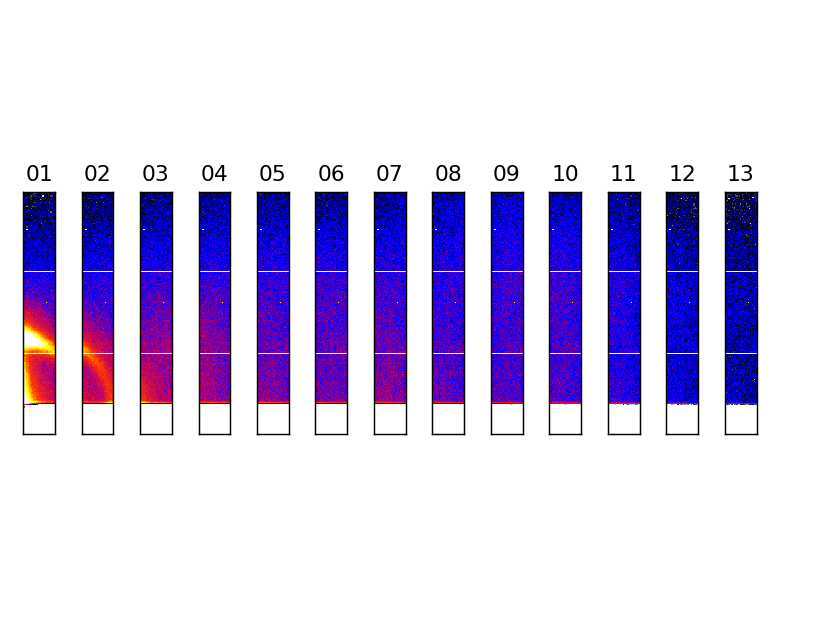

In [51]:


fig = plt.figure()# figsize=[2,8]) 
for i in range(Ns, Ns+Ni):
    #print(i)
    ax = fig.add_subplot(1, Ni+1, i+1)
    #d = process.load(  infiles[i]  )
    
    d = np.array(  PIL.Image.open(infiles[i]).convert('I') )
    #vmin=  max(1, d.mean() - d.std()*sca), vmax= d.mean() + d.std()*sca,
    sca= 1
    show_img( (d).T, logs = True, show_colorbar= False,show_ticks =False,
             ax= [fig, ax], image_name= '%02d'%(i+1), cmap = cmap_vge_hdr, 
             vmin= vmin, vmax= vmax,              
            aspect=1, save=False, path=ResDir)
    
fig.savefig(ResDir + k+'raw_image_%s-%s.png'%(Ns, Ns+Ni))

<IPython.core.display.Javascript object>


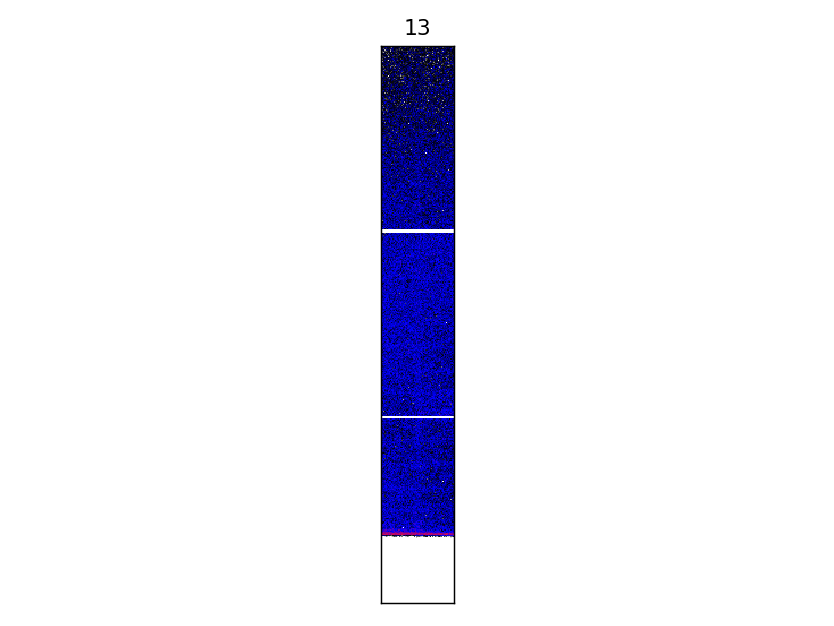

In [142]:
    show_img( (d).T, logs = True, show_colorbar= False,show_ticks =False,
             image_name= '%02d'%(i+1), cmap = cmap_vge_hdr, 
             vmin= vmin, vmax= vmax,              
            aspect=1, save=False, path=ResDir)

# Set data for stitching

In [110]:
Ns = 0  #Ns = 210 is a good for benchmark
Ni = 13

if Ns%2:
    snake = True
    print('This is a snake scan.')
else:
    snake = False
if snake:
    infiles = sorted( fp[k] )[ Ns: Ns+Ni][::-1]
else:
    infiles = sorted( fp[k] )[ Ns: Ns+Ni] 

print( sorted(fp[k])[Ns])
#phis = np.array( [get_phi(infile, phi_offset= 0, phi_start=4.5, phi_spacing= 4.0, ext='_WAXS.tif') for infile in infiles]     )
start_angle = 5.0
phi_spacing = 6.5
phis = -start_angle - np.arange(0, Ni) * phi_spacing 
print('The rotated angles are: %s.'%phis)


/GPFS/xf12id1/data/300KW/images/users/302845/PDCBT_ITIC_ASSQ_0.52deg_extended_2470eV_waxs_000001_WAXS.tif
The rotated angles are: [ -5.  -11.5 -18.  -24.5 -31.  -37.5 -44.  -50.5 -57.  -63.5 -70.  -76.5
 -83. ].


In [111]:
overlap_width = get_pixel_overlap( phi_spacing )
print( overlap_width )

14


# Find the scaling factor for stitiching
* define the smoothing parameter (w, p)  in a savgol_filter algorithm

In [112]:
w= 301

if w>=101:
    p = 5
else:
    p=3
    
print(w,p)    
    

301 5


# Stich by giving filenames

In [113]:
infiles

['/GPFS/xf12id1/data/300KW/images/users/302845/PDCBT_ITIC_ASSQ_0.52deg_extended_2470eV_waxs_000001_WAXS.tif',
 '/GPFS/xf12id1/data/300KW/images/users/302845/PDCBT_ITIC_ASSQ_0.52deg_extended_2470eV_waxs_000002_WAXS.tif',
 '/GPFS/xf12id1/data/300KW/images/users/302845/PDCBT_ITIC_ASSQ_0.52deg_extended_2470eV_waxs_000003_WAXS.tif',
 '/GPFS/xf12id1/data/300KW/images/users/302845/PDCBT_ITIC_ASSQ_0.52deg_extended_2470eV_waxs_000004_WAXS.tif',
 '/GPFS/xf12id1/data/300KW/images/users/302845/PDCBT_ITIC_ASSQ_0.52deg_extended_2470eV_waxs_000005_WAXS.tif',
 '/GPFS/xf12id1/data/300KW/images/users/302845/PDCBT_ITIC_ASSQ_0.52deg_extended_2470eV_waxs_000006_WAXS.tif',
 '/GPFS/xf12id1/data/300KW/images/users/302845/PDCBT_ITIC_ASSQ_0.52deg_extended_2470eV_waxs_000007_WAXS.tif',
 '/GPFS/xf12id1/data/300KW/images/users/302845/PDCBT_ITIC_ASSQ_0.52deg_extended_2470eV_waxs_000008_WAXS.tif',
 '/GPFS/xf12id1/data/300KW/images/users/302845/PDCBT_ITIC_ASSQ_0.52deg_extended_2470eV_waxs_000009_WAXS.tif',
 '/GPFS/xf

In [58]:
#Correct_Overlap_Images_Intensities?#

In [171]:
%run ~/pySMI/pySMI/Stitching.py

In [172]:
do_smooth= True #False #True

<IPython.core.display.Javascript object>


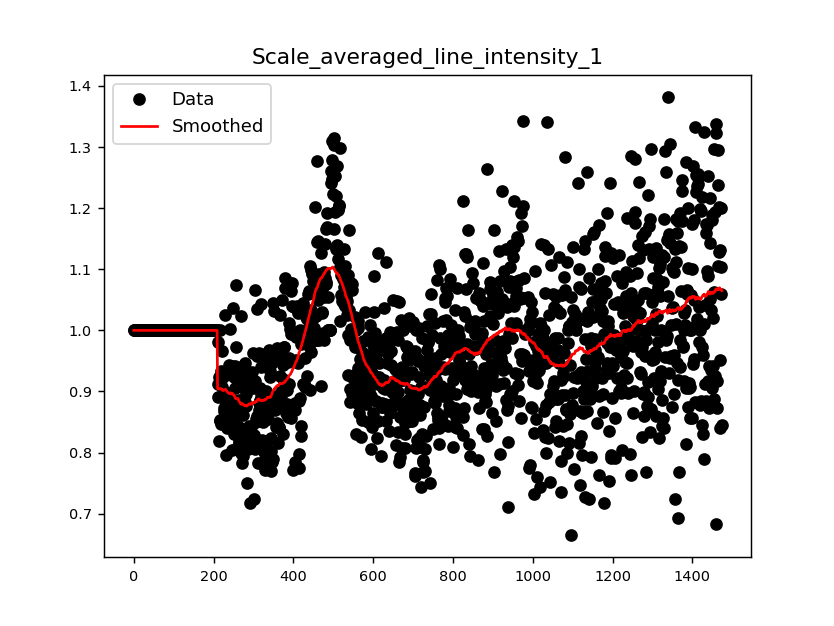

In [184]:
data, dataM, scale,scale_smooth = Correct_Overlap_Images_Intensities( infiles, window_length=w, polyorder=p, 
                            overlap_width= overlap_width, badpixel_width = 10, do_smooth= do_smooth,
                       pixel_start_smooth = 210,pixel_stop_smooth =None  )

check_overlap_scaling_factor( scale,scale_smooth, i=1, 
                             filename = ResDir + k + 'smoothed_one_line_1_%s-%s.png'%(Ns, Ns+Ni), 
                             save= True )


# OR Stitch by giving data

In [185]:
give_data= False

In [186]:
if give_data:
    fps = [  'BSpec_RT_FullSample_ExoMeso_Coarse_Scan_%03d_WAXS.tif'%i for i in range(91, 96)]
    print(fps)

In [187]:
if give_data:
    Data = np.zeros( 5, dtype= object )
    for j, fp in enumerate( fps ):
        Data[j] = np.array(  PIL.Image.open( inDir + fp    ).convert('I') )


In [188]:
if give_data:
    data, dataM, scale,scale_smooth = Correct_Overlap_Images_Intensities( infiles, Data=Data,
                                                window_length=w, polyorder=p, 
                            overlap_width= overlap_width, badpixel_width = 10  )

    check_overlap_scaling_factor( scale,scale_smooth, i=1, 
                             filename = ResDir + k + 'smoothed_one_line_1_%s-%s.png'%(Ns, Ns+Ni), 
                             save= True )


# Stitching data here

In [189]:
angzs, angze, angxs, angxe = [
    np.degrees( np.arctan2 ( (beam_y-data.shape[0]) * 172/1e6, sam_det ) ), 
    np.degrees( np.arctan2 ( ( beam_y ) * 172/1e6, sam_det ) ),
    abs(phis[0]) - 3.5, 
    abs(phis[ len(phis)-1]) + 3.5     ] 

ytick = np.round( np.linspace(angzs, angze, 9 ), 0 )
xtick = np.round( np.linspace(angxs, angxe, 8 ), 0 )
axs =  np.linspace(angxs, angxe, data.shape[1] )
azs =  np.linspace(angzs, angze, data.shape[0] )

In [190]:
print( angxs, angxe, angzs, angze )

1.5 86.5 -5.67923603851 39.4577340262


# Stitching data in angle space

<IPython.core.display.Javascript object>


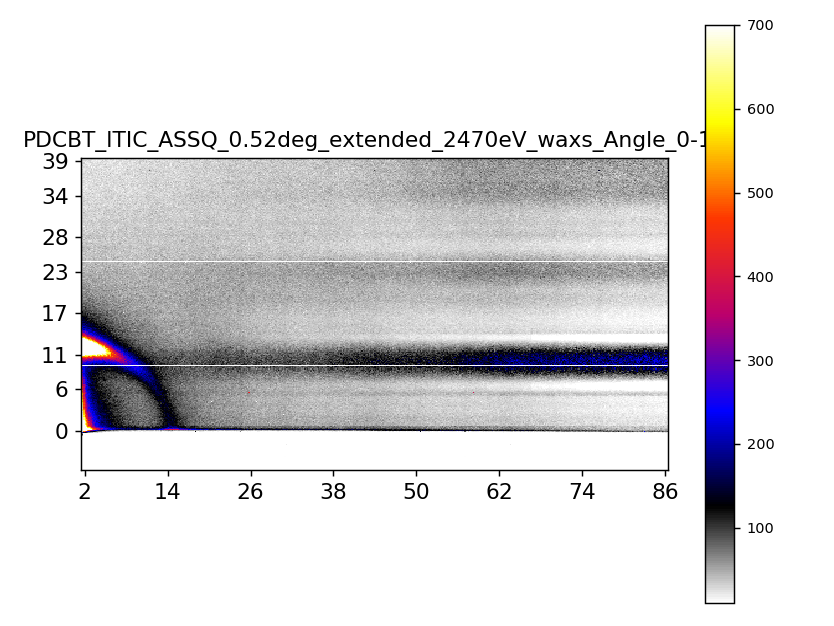

In [191]:


fig,ax=plt.subplots()
show_img(data, logs = False,  ax=[fig,ax], 
         vmin=vmin, vmax=vmax,
         cmap = cmap_vge_hdr,  extent=[angxs, angxe, angzs, angze], aspect=1,  
         image_name = k+ 'Angle_%s-%s'%(Ns, Ns+Ni), dpi=500, save=False, path=ResDir)
ax.set_yticks( ytick )
ax.set_xticks( xtick )

fig.savefig( ResDir +  k+ 'Angle_%s-%s.png'%(Ns, Ns+Ni) )

# Stitching data in q-space

-5.0 -83.0 [ 0.03110298  1.70236777 -0.12310495  0.80124235]


/home/yuzhang/pySMI/pySMI/Stitching.py:281: RuntimeWarning: invalid value encountered in true_divide
  Intensity_map = np.nan_to_num( Intensity_map/count_map )


<IPython.core.display.Javascript object>


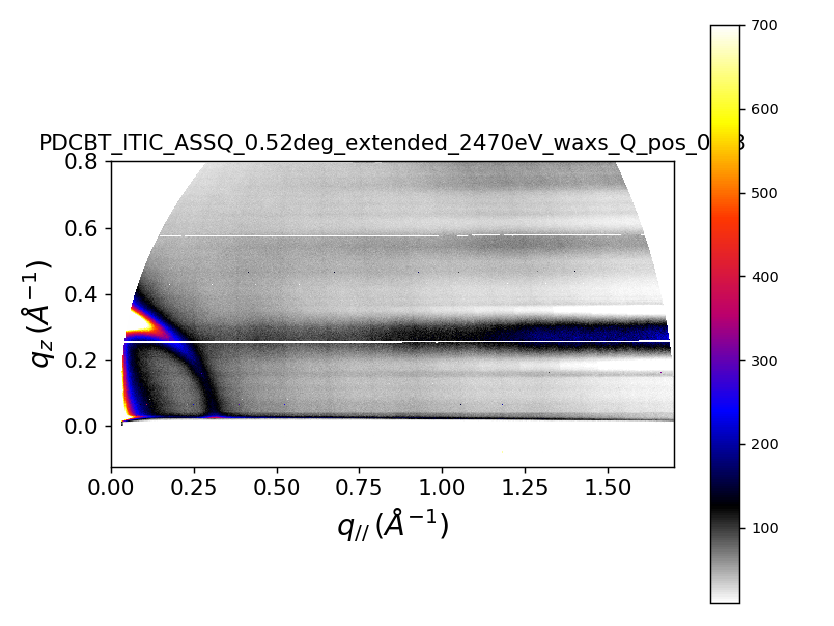

In [192]:
qdata, xs, zs = stitch_WAXS_in_Qspace( dataM, phis, calibration, x='Qr',
                              dx= 0, dy = 22, dz = 0,  dq= dq, mask=mask.data.T )
    
show_img(qdata, logs = False,  vmin=  vmin, vmax= vmax,
         extent=[xs[0], xs[-1], zs[0],zs[-1]], xlabel='$q_{//} \, (\AA^{-1})$',  ylabel='$q_z \, (\AA^{-1})$', 
         cmap = cmap_vge_hdr,   aspect=1,  image_name = k + 'Q_pos_%s-%s'%(Ns, Ns+Ni), 
         save=True, path=ResDir)



# Show the stitched image with a ring

In [193]:
if False:
    bx,by = np.argmin( np.abs(xs) ), np.argmin( np.abs(zs) )

    ring_mask = create_ring_mask( qdata.shape, 103, 184, [bx,by]  )

    show_img(qdata, label_array=ring_mask, logs = False, 
         vmin=  max(0,qdata.mean() -qdata.std()*sca), vmax= qdata.mean() + qdata.std()*sca,          
         cmap = cmap_vge_hdr,   aspect=1,  image_name = k + 'Q')


# Save data

xx, zz = np.meshgrid( axs, azs)            
m = np.round( np.vstack( [xx.ravel(), zz.ravel(), data.ravel()] ).T, 5) 
np.savetxt( ResDir  + k + 'Angle_data_%s_%s.txt'%(Ns, Ns+5),   m,fmt='%.5e', ) 
#np.save(  ResDir  + k + 'Angle_data', data )

xx, zz = np.meshgrid( xs, zs)            
m = np.round( np.vstack( [xx.ravel(), zz.ravel(), qdata.ravel()] ).T, 5) 
np.savetxt( ResDir  + k + 'Q_data_%s_%s.txt'%(Ns, Ns+5),   m,fmt='%.5e', ) 
#np.save(  ResDir  + k + 'Angle_data', data )

In [ ]:
save_array_to_tiff(  qdata, ResDir + k + 'Qmap_%s-%s.tif'%(Ns, Ns+Ni)  )
np.savetxt(  ResDir + k + 'Qmap_qx_cor_%s-%s.txt'%(Ns, Ns+Ni),  xs )
np.savetxt(  ResDir + k + 'Qmap_qz_cor_%s-%s.txt'%(Ns, Ns+Ni),  zs )